In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_excel('/Users/apple/Downloads/iris.xls')

In [9]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

## Filling null values.

In [11]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

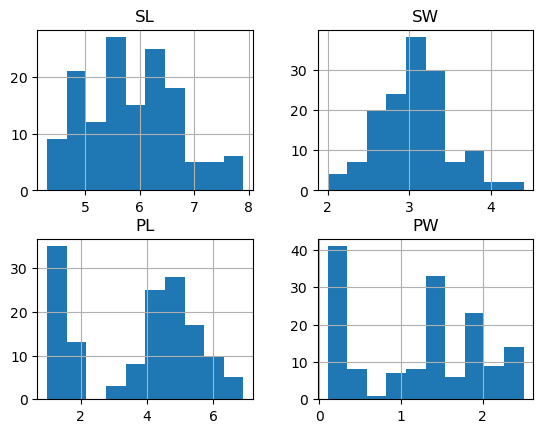

In [12]:
data.hist();

In [13]:
print(data['SL'].skew())
print(data['SW'].skew())
print(data['PL'].skew())
print(data['PW'].skew())

0.3068227108046868
0.37781843718771746
-0.2689053923783847
-0.10499656214412734


Not highly skewed, so let us use median to fill the Null values.

In [14]:
for i in data[['SL', 'SW', 'PL', 'PW']]:
    data[i] = data[i].fillna(data[i].median())

In [15]:
data.isnull().sum().sum()

0

## Feature Scaling

In [16]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [20]:
to_scale = data.drop('Classification', axis = 1)
to_scale.head(3)

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2


In [19]:
from sklearn.preprocessing import StandardScaler
to_scale = StandardScaler().fit_transform(to_scale)

In [21]:
to_scale = pd.DataFrame(to_scale)
to_scale.head(3)

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2


In [22]:
data = data.drop(['SL', 'SW', 'PL', 'PW'], axis = 1)

In [23]:
data = pd.concat((to_scale, data), axis = 1)

In [24]:
data.columns = ['SL', 'SW', 'PL', 'PW', 'Classification']

In [25]:
data.head(4)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


## Label Ecnoding

In [26]:
from sklearn.preprocessing import LabelEncoder 
data['Classification'] = LabelEncoder().fit_transform(data['Classification'])

In [27]:
data.head(3)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0


## Logistic Regression

In [31]:
inde = data.drop('Classification', axis = 1)
dep = data['Classification']
#Creating train and test data

In [34]:
inde.head(3) 

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2


In [33]:
dep.head(3)

0    0
1    0
2    0
Name: Classification, dtype: int64

### Splitting dataframe  to training and testing data.

In [35]:
from sklearn.model_selection import train_test_split
inde_test, inde_train, dep_test, dep_train = train_test_split(inde, dep, test_size=0.25, random_state=46)

In [36]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', max_iter=120).fit(inde_train, dep_train)

In [39]:
logi_pred = logi_model.predict(inde_test)
logi_pred

array([2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2,
       0, 1])

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
cm = confusion_matrix(dep_test, logi_pred)

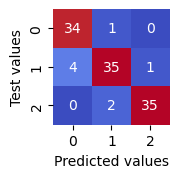

In [42]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.show()

In [43]:
print(metrics.classification_report(dep_test, logi_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.92      0.88      0.90        40
           2       0.97      0.95      0.96        37

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112



## Performing KNN

In [44]:
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier

#### Parameter tuning. 

In [45]:
acc_metric = []
neighbours = np.arange(3,15)

In [46]:
for i in neighbours:
    classifier = KNeighborsClassifier(n_neighbors = i, metric='euclidean')
    classifier.fit(inde_train, dep_train)
    knn_pred = classifier.predict(inde_test)
    knn_acc = accuracy_score(dep_test, knn_pred)
    acc_metric.append(knn_acc)

In [47]:
print(acc_metric)

[0.9285714285714286, 0.9285714285714286, 0.9464285714285714, 0.9375, 0.9375, 0.9196428571428571, 0.9375, 0.9285714285714286, 0.9285714285714286, 0.9107142857142857, 0.9196428571428571, 0.9196428571428571]


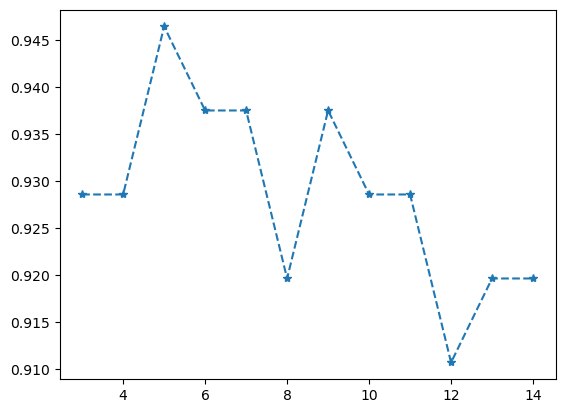

In [48]:
plt.plot(neighbours, acc_metric, '*--')

#### 7 neighbors give the maximum accuracy.

In [49]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
classifier.fit(inde_train, dep_train)
knn_pred = classifier.predict(inde_test)

In [50]:
cm_kNN = confusion_matrix(dep_test,knn_pred)

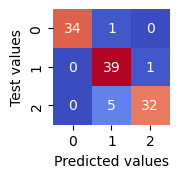

In [51]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm_kNN, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.show()

In [52]:
print(metrics.classification_report(dep_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.87      0.97      0.92        40
           2       0.97      0.86      0.91        37

    accuracy                           0.94       112
   macro avg       0.95      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



---

#### Comparing both models.

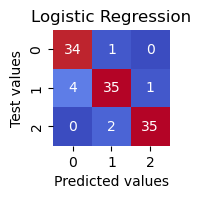

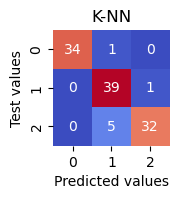

In [53]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.title('Logistic Regression')

plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm_kNN, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.title('K-NN')
plt.show()

In [54]:
print(metrics.classification_report(dep_test, logi_pred))
print(metrics.classification_report(dep_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.92      0.88      0.90        40
           2       0.97      0.95      0.96        37

    accuracy                           0.93       112
   macro avg       0.93      0.93      0.93       112
weighted avg       0.93      0.93      0.93       112

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.87      0.97      0.92        40
           2       0.97      0.86      0.91        37

    accuracy                           0.94       112
   macro avg       0.95      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112



Result: The Logistic regression gives the best result'.The f1 score is better for the logistic regression. 

---